In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [3]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
y = reg(X) + np.random.normal(0, 5, 100)

In [4]:
X.shape, reg(X).shape, y.shape

((100,), (100,), (100,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

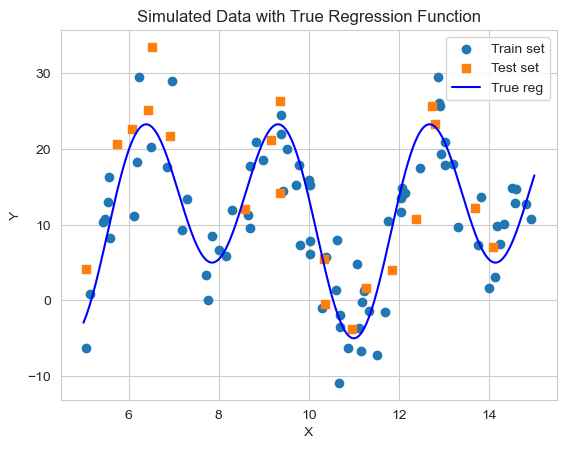

In [6]:
# Plot the training and testing points
plt.scatter(X_train, y_train, marker='o', label='Train set')
plt.scatter(X_test, y_test, marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [8]:
def gaussian(x):
    return np.exp(-(x**2)/2)

In [11]:
# gaussian(np.array([1,2,3,4,5]))

In [10]:
# kernel smoother regression estimator
def kernel_reg(x, X_train, y_train, kernel = gaussian, h = 0.5):
    m = len(x) # length of the given input
    res = []
    for k in range(m):
        wt = kernel((x[k] - X_train)/h) # computing weights
        res.append(sum(wt*y_train)/sum(wt)) # computing kernel smoother regression estimate
    return np.array(res)

In [12]:
kernel_reg([1.1, 2, 3], X_train, y_train)

array([-4.62282327, -4.12239255, -3.02227091])

In [16]:
y_pred_test = kernel_reg(X_test, X_train = X_train, y_train = y_train, h = 0.25)
y_pred_test.shape

(20,)

In [17]:
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

Test MSE: 22.860216590491525


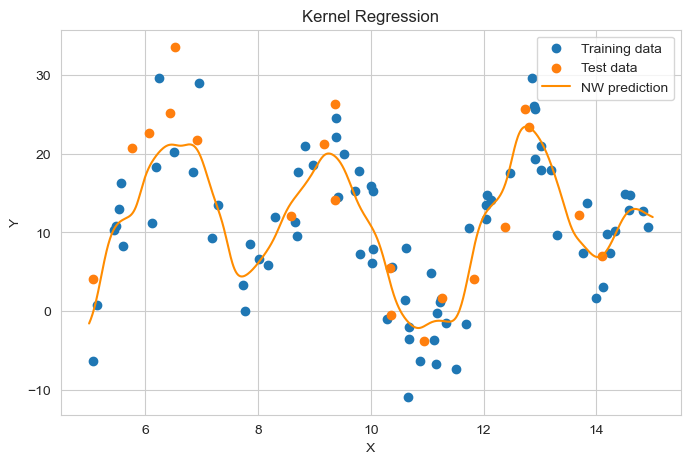

In [ ]:
# Predict for plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
# try the graph with different values of h
y_plot = kernel_reg(X_plot, X_train = X_train, y_train = y_train, h = 0.2)
plt.plot(X_plot, y_plot, color='darkorange', label='NW prediction')
plt.title('Kernel Regression')
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [22]:
Res = []
R = 50
H = [0.05,0.1,0.25,0.5,1,1.5,2]

for r in range(R):
    np.random.seed(r)
    # Generate data
    X = np.random.uniform(5, 15, 100)
    y = reg(X) + np.random.normal(0, 5, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # X_train = X[:80]; X_test = X[80:]; y_train = y[:80]; y_test = y[80:]
    
    errs = []
    for h in H:
        y_pred_train = kernel_reg(X_train, X_train = X_train, y_train = y_train, kernel=gaussian, h = h)
        y_pred_test = kernel_reg(X_test, X_train = X_train, y_train = y_train, kernel=gaussian, h = h)
        
        trn_errs = mean_squared_error(y_train, y_pred_train)
        tst_errs = mean_squared_error(y_test, y_pred_test)
        
        errs.append([trn_errs, tst_errs])
    
    Res.append(errs)

Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='h', value=H)
Res_df

,h,Avg Train error,Avg Test error
0,0.05,8.572483,43.695937
1,0.10,13.590683,37.418331
2,0.25,21.018975,32.735753
3,0.50,33.004916,41.656708
4,1.00,67.914603,75.640957
5,1.50,83.355954,89.272849
6,2.00,87.493054,91.858240


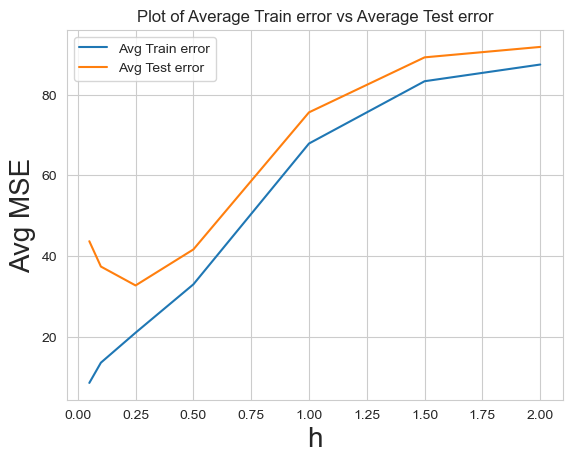

In [23]:
plt.plot(Res_df['h'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['h'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('h', fontsize=20); plt.ylabel('Avg MSE', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()